In [1]:
import pandas as pd

In [3]:
df = pd.read_csv(r'Dataset/train.csv')

In [4]:
df

,audio,transcript
0,train_sample_0,على إنها عار في الوقت اللي كانت بتتعامل مع أخو...
1,train_sample_1,فأكيد ربنا عوضهم خير هو الراجل بيبقى ليه إختيا...
2,train_sample_2,زي دول كتيره بنشوفها النهارده في العالم وأصبحت...
3,train_sample_3,يعني مين اللي بيحط شروطها يعني أنا شايفه إني م...
4,train_sample_4,والله هي الموضوع مش كليب خلي بالك ولا أغنيه ال...
...,...,...
50710,train_sample_50710,كل شيء يعني وارد في ضوء احتياجات الناس وضوء ال...
50711,train_sample_50711,يلا خلينا نشجعهم بذمه ويرجعولنا منصورين فاصل و...
50712,train_sample_50712,و لا نقلل من قيمة ده فبالتالي منعرفش نستفيد من...
50713,train_sample_50713,نبع يجري للعبد أجرهن بعد موته وهو في قبره


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50715 entries, 0 to 50714
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   audio       50715 non-null  object
 1   transcript  50709 non-null  object
dtypes: object(2)
memory usage: 792.6+ KB


In [6]:
df.describe()

,audio,transcript
count,50715,50709
unique,50715,50653
top,train_sample_0,خلاص
freq,1,4


In [8]:
len(df.transcript[0].split())

14

In [7]:
df['numb']= df['transcript'].map(lambda x : len(str(x).split()))

In [9]:
df.numb.max()

48

In [14]:
df.numb.min()

1

In [10]:
df.query('numb <= 32')

,audio,transcript,numb
0,train_sample_0,على إنها عار في الوقت اللي كانت بتتعامل مع أخو...,14
1,train_sample_1,فأكيد ربنا عوضهم خير هو الراجل بيبقى ليه إختيا...,19
2,train_sample_2,زي دول كتيره بنشوفها النهارده في العالم وأصبحت...,13
3,train_sample_3,يعني مين اللي بيحط شروطها يعني أنا شايفه إني م...,12
4,train_sample_4,والله هي الموضوع مش كليب خلي بالك ولا أغنيه ال...,21
...,...,...,...
50710,train_sample_50710,كل شيء يعني وارد في ضوء احتياجات الناس وضوء ال...,15
50711,train_sample_50711,يلا خلينا نشجعهم بذمه ويرجعولنا منصورين فاصل و...,11
50712,train_sample_50712,و لا نقلل من قيمة ده فبالتالي منعرفش نستفيد من...,13
50713,train_sample_50713,نبع يجري للعبد أجرهن بعد موته وهو في قبره,9


In [30]:
df.query('numb >= 45')

,audio,transcript,numb
23347,train_sample_23347,حضرتك أنا معرفش المريضه لا حوله ولا قوه إلا با...,48
27330,train_sample_27330,يعني تلاقي الراجل مثلا شايل هم مش عارفه إيه وش...,45


In [17]:
df.describe()

,numb
count,50715.000000
mean,13.338243
std,5.361914
min,1.000000
25%,9.000000
50%,13.000000
75%,17.000000
max,48.000000


In [18]:
audio_names = df['audio']

In [19]:
import librosa
from IPython.display import Audio

In [20]:
audiopath = audio_names.iloc[23347]

In [22]:
y , sr = librosa.load(f"/media/yahya/Users/yahya/Whisper-MAY/Dataset/train/{audiopath}.wav")

In [23]:
Audio(y , rate=sr )

In [31]:
df.isnull().sum()

audio         0
transcript    6
numb          0
dtype: int64

In [35]:
df.dtypes

audio         object
transcript    object
numb           int64
dtype: object

In [38]:
df.groupby('transcript').describe()

numb                   \
                                                   count  mean  std   min   
transcript                                                                  
<fil>                                                3.0   1.0  0.0   1.0   
<fil> <fil> <fil> <fil> <fil>                        2.0   5.0  0.0   5.0   
<fil> <fil> <fil> <fil> <fil> <fil> <laugh> ما ...   1.0  16.0  NaN  16.0   
<fil> <fil> <fil> <fil> <fil> <fil> <overlap>        1.0   7.0  NaN   7.0   
<fil> <fil> <fil> <fil> <fil> <overlap>              1.0   6.0  NaN   6.0   
...                                                  ...   ...  ...   ...   
يوميها قالت إن المجلس القومي عمل شخصية نورا عرو...   1.0  19.0  NaN  19.0   
يونس شلبي وأحمد زكي كان لسه طالع أه الله يرحمه       1.0  10.0  NaN  10.0   
يوه هنا أنا عندي مسلسلات بالمناسبه عن روايات         1.0   8.0  NaN   8.0   
ييجي من أنهي ناحيه ناحية الموهبه ولا ناحية الدر...   1.0  13.0  NaN  13.0   
ييسدد ازاي أو ظروفه تبقى ازاي أه هيتحط في أزمه ...   1.0  24.0  NaN  24.0   

                                                                            
                                                     25%   50%   75%   max  
transcript                                                                  
<fil>                                                1.0   1.0   1.0   1.0  
<fil> <fil> <fil> <fil> <fil>                        5.0   5.0   5.0   5.0  
<fil> <fil> <fil> <fil> <fil> <fil> <laugh> ما ...  16.0  16.0  16.0  16.0  
<fil> <fil> <fil> <fil> <fil> <fil> <overlap>        7.0   7.0   7.0   7.0  
<fil> <fil> <fil> <fil> <fil> <overlap>              6.0   6.0   6.0   6.0  
...                                                  ...   ...   ...   ...  
يوميها قالت إن المجلس القومي عمل شخصية نورا عرو...  19.0  19.0  19.0  19.0  
يونس شلبي وأحمد زكي كان لسه طالع أه الله يرحمه      10.0  10.0  10.0  10.0  
يوه هنا أنا عندي مسلسلات بالمناسبه عن روايات         8.0   8.0   8.0   8.0  
ييجي من أنهي ناحيه ناحية الموهبه ولا ناحية الدر...  13.0  13.0  13.0  13.0  
ييسدد ازاي أو ظروفه تبقى ازاي أه هيتحط في أزمه ...  24.0  24.0  24.0  24.0  

[50653 rows x 8 columns]

In [39]:
df.groupby('numb').describe()

audio                                 transcript         \
     count unique                 top freq      count unique   
numb                                                           
1      127    127  train_sample_49864    1        121     95   
2      212    212  train_sample_50609    1        212    205   
3      424    424  train_sample_50648    1        424    419   
4      739    739  train_sample_50518    1        739    736   
5     1121   1121  train_sample_50679    1       1121   1118   
6     1666   1666  train_sample_50689    1       1666   1666   
7     2260   2260  train_sample_50676    1       2260   2256   
8     2929   2929  train_sample_50705    1       2929   2928   
9     3380   3380  train_sample_50713    1       3380   3379   
10    3598   3598  train_sample_50694    1       3598   3597   
11    3660   3660  train_sample_50711    1       3660   3660   
12    3775   3775  train_sample_50702    1       3775   3774   
13    3747   3747  train_sample_50712    1       3747   3746   
14    3594   3594  train_sample_50708    1       3594   3594   
15    3336   3336  train_sample_50710    1       3336   3336   
16    2938   2938  train_sample_50698    1       2938   2936   
17    2648   2648  train_sample_50714    1       2648   2647   
18    2273   2273  train_sample_50696    1       2273   2273   
19    1782   1782  train_sample_50704    1       1782   1782   
20    1522   1522  train_sample_50598    1       1522   1522   
21    1199   1199  train_sample_50707    1       1199   1199   
22     924    924  train_sample_50475    1        924    924   
23     763    763  train_sample_50561    1        763    763   
24     560    560  train_sample_50666    1        560    560   
25     442    442  train_sample_50701    1        442    442   
26     319    319  train_sample_50378    1        319    319   
27     229    229  train_sample_50556    1        229    229   
28     171    171  train_sample_50421    1        171    171   
29     126    126  train_sample_50470    1        126    126   
30      73     73  train_sample_49908    1         73     73   
31      59     59     train_sample_93    1         59     59   
32      33     33   train_sample_2004    1         33     33   
33      30     30   train_sample_1700    1         30     30   
34      28     28   train_sample_1734    1         28     28   
35       5      5   train_sample_6906    1          5      5   
36       4      4   train_sample_6918    1          4      4   
37       7      7  train_sample_23549    1          7      7   
38       3      3  train_sample_22507    1          3      3   
39       3      3  train_sample_10094    1          3      3   
41       1      1  train_sample_35989    1          1      1   
42       1      1   train_sample_8240    1          1      1   
43       1      1  train_sample_24262    1          1      1   
44       1      1   train_sample_7746    1          1      1   
45       1      1  train_sample_27330    1          1      1   
48       1      1  train_sample_23347    1          1      1   

                                                              
                                                    top freq  
numb                                                          
1                                                  خلاص    4  
2                                            بعد الفاصل    3  
3                                      اللفه اللي بعدها    3  
4                                بسم الله الرحمن الرحيم    3  
5                                    إن شاء الله عز وجل    2  
6                الأنحاء بالمناسبه دي من أجمل المناسبات    1  
7                      ده هي راحت كنتوا متخانقين مع بعض    2  
8             هات بقى كل الخدمات اللي معاك كده وفرجهالي    2  
9     يعني نصيحه أمويه مني لو قابلتوها فنيللي شريهان ده    2  
10     القريب و البعيد المصلح و المخطئ و الصديق و العدو    2  
11    يلا خلينا نشجعهم بذمه ويرجعولنا منصورين فاصل و...    1  
12    طيب دلوقتي مين كان بيعمل مصيبه ومين في الأهل

In [40]:
df.groupby('numb').describe().tail()

audio                                 transcript         \
     count unique                 top freq      count unique   
numb                                                           
42       1      1   train_sample_8240    1          1      1   
43       1      1  train_sample_24262    1          1      1   
44       1      1   train_sample_7746    1          1      1   
45       1      1  train_sample_27330    1          1      1   
48       1      1  train_sample_23347    1          1      1   

                                                              
                                                    top freq  
numb                                                          
42    وكيفية التأهيل وحاجات ونقاط كتير جدا اتكلمنا ف...    1  
43    اسمعيني بس أنا أعرف مصلحتك لأ لأ لا لا لا لا و...    1  
44    معلومه إن هو كان رايح النادي الاهلي بس ساعتها ...    1  
45    يعني تلاقي الراجل مثلا شايل هم مش عارفه إيه وش...    1  
48    حضرتك أنا معرفش المريضه لا حوله ولا قوه إلا با...    1

In [46]:
audion = '24262'

In [47]:
y , sr = librosa.load(f"/media/yahya/Users/yahya/Whisper-MAY/Dataset/train/train_sample_{audion}.wav")

In [69]:
aud , sa = librosa.load("/media/yahya/Users/yahya/Whisper-MAY/Dataset/train/train_sample_18.wav")

In [70]:
sa

22050

In [50]:
Audio(y , rate=sr)   # i see this must remove from training...so noisy 24262

In [55]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

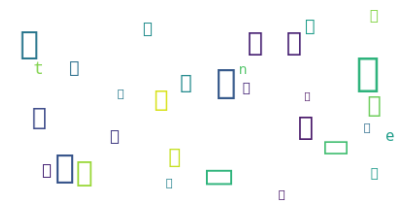

In [61]:
text = " ".join(desc for desc in str(df["transcript"]))

wordcloud = WordCloud(max_font_size=50, max_words=30, background_color="white").generate(text)
plt.figure(figsize=(5,3))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [66]:
(waveform, sample_rate) = librosa.load(f"/media/yahya/Users/yahya/Whisper-MAY/Dataset/train/train_sample_{audion}.wav")
spectrogram = librosa.feature.melspectrogram(y=waveform, sr=sample_rate)


In [67]:
spectrogram

array([[7.6235518e-02, 1.8728332e-01, 4.5877382e-01, ..., 4.6904826e-01,
        3.8938355e-01, 5.9093207e-01],
       [2.9225010e-01, 8.5009587e-01, 1.1666038e+00, ..., 1.3914567e+00,
        3.5447538e-01, 7.8749591e-01],
       [2.8826052e-01, 2.9673326e-01, 2.8459847e-01, ..., 1.7246306e+00,
        1.8550923e+00, 2.1360772e+00],
       ...,
       [1.2373052e-07, 3.0730810e-08, 2.4853791e-15, ..., 3.4735828e-15,
        8.7194647e-11, 5.7249963e-07],
       [1.2329238e-07, 3.0627760e-08, 6.8184649e-16, ..., 7.2420184e-16,
        8.4361823e-11, 5.5310358e-07],
       [1.2299175e-07, 3.0556524e-08, 2.3249776e-16, ..., 5.7632905e-16,
        8.2639257e-11, 5.4134330e-07]], dtype=float32)

In [76]:
import librosa

audio_path = "/media/yahya/Users/yahya/Whisper-MAY/Dataset/train/train_sample_18.wav"
y, sr = librosa.load(audio_path, sr=None)

if sr == 16000:
    print("The sample rate of the audio file is 16000 Hz.")
else:
    print(f"The sample rate of the audio file is {sr} Hz, not 16000 Hz.")


The sample rate of the audio file is 16000 Hz.


In [75]:
sr

16000

In [31]:
import torch
from torch import nn
from transformers import AutoModel

# Path to your .vec and .bin files
vec_file = 'C:/Users/yahya/Downloads/cc.arz.300.vec'
bin_file = 'C:/Users/yahya/Downloads/cc.arz.300.bin'

# Load word vectors from .vec file
word_vectors = {}
with open(vec_file, 'r', encoding='utf-8') as f:
    # Skip the first line if it contains metadata
    line = f.readline().strip().split()
    num_words, vec_size = int(line[0]), int(line[1])
    for line in f:
        tokens = line.strip().split()
        word = tokens[0]
        vec = torch.tensor([float(x) for x in tokens[1:]])
        word_vectors[word] = vec

# Define a simple Tokenizer class
class SimpleTokenizer:
    def __init__(self, word_vectors):
        self.word_vectors = word_vectors
        self.token_to_index = {token: idx for idx, token in enumerate(word_vectors.keys())}
        self.index_to_token = {idx: token for token, idx in self.token_to_index.items()}
        self.vocab_size = len(self.token_to_index)
        self.embedding_dim = next(iter(word_vectors.values())).shape[0]
        self.embedding_matrix = torch.stack(list(word_vectors.values()))

    def tokenize(self, text):
        tokens = text.split()
        token_ids = [self.token_to_index[token] for token in tokens if token in self.token_to_index]
        return token_ids

    def get_embeddings(self, token_ids):
        return nn.Embedding.from_pretrained(self.embedding_matrix)(torch.LongTensor(token_ids))

# Create a simple tokenizer
tokenizer = SimpleTokenizer(word_vectors)

# Example of embeddings
sentence = "يعم ماشي"
token_ids = tokenizer.tokenize(sentence)
embeddings = tokenizer.get_embeddings(token_ids)
print(embeddings)


tensor([[-2.7000e-03, -7.8000e-03, -2.5200e-02, -2.7000e-03, -3.0000e-04,
         -1.4500e-02, -9.1000e-03, -1.4700e-02,  9.1000e-03,  3.4700e-02,
         -8.6000e-03,  8.7000e-03, -3.1700e-02,  1.9000e-02,  1.5000e-03,
          2.0300e-02, -3.7100e-02, -2.5900e-02, -2.0500e-02,  1.7700e-02,
          1.0800e-02,  4.8200e-02, -3.1900e-02, -2.4000e-03, -1.1600e-02,
          1.0700e-02, -6.3000e-03,  4.0000e-02, -3.9000e-03, -4.6100e-02,
          2.1000e-03,  4.8500e-02,  9.6000e-03, -1.3200e-02,  6.3000e-03,
         -3.1200e-02,  2.0500e-02, -1.0500e-02, -2.5700e-02, -2.5700e-02,
          1.5000e-02,  1.5000e-02,  2.3100e-02,  7.6000e-03,  1.4900e-02,
         -6.7600e-02,  1.9800e-02,  6.5000e-03, -2.7700e-02,  2.3600e-02,
          2.0200e-02, -1.5700e-02,  2.2000e-03, -3.8500e-02,  1.2800e-02,
          2.7500e-02, -3.5900e-02,  1.6400e-02,  6.8900e-02, -5.0000e-03,
         -2.2000e-03,  3.4900e-02,  1.5100e-02, -2.0000e-04, -1.4000e-02,
          3.0000e-03, -5.0300e-02,  5.

In [12]:
import torch
import pickle
from torch import nn

# Define a simple Tokenizer class
class SimpleTokenizer:
    def __init__(self, word_vectors):
        self.word_vectors = word_vectors
        self.token_to_index = {token: idx for idx, token in enumerate(word_vectors.keys())}
        self.index_to_token = {idx: token for token, idx in self.token_to_index.items()}
        self.vocab_size = len(self.token_to_index)
        self.embedding_dim = next(iter(word_vectors.values())).shape[0]
        self.embedding_matrix = torch.stack(list(word_vectors.values()))

    def tokenize(self, text):
        tokens = text.split()
        token_ids = [self.token_to_index[token] for token in tokens if token in self.token_to_index]
        return token_ids

    def get_embeddings(self, token_ids):
        return nn.Embedding.from_pretrained(self.embedding_matrix)(torch.LongTensor(token_ids))

# Load word vectors from .vec file
vec_file = 'C:/Users/yahya/Downloads/cc.arz.300.vec'
word_vectors = {}
with open(vec_file, 'r', encoding='utf-8') as f:
    # Skip the first line if it contains metadata
    line = f.readline().strip().split()
    num_words, vec_size = int(line[0]), int(line[1])
    for line in f:
        tokens = line.strip().split()
        word = tokens[0]
        vec = torch.tensor([float(x) for x in tokens[1:]])
        word_vectors[word] = vec

# Create a simple tokenizer
tokenizer = SimpleTokenizer(word_vectors)

# Save tokenizer to a file using pickle
tokenizer_file = 'tokenizer.pkl'
with open(tokenizer_file, 'wb') as f:
    pickle.dump(tokenizer, f)

print(f"Tokenizer saved to {tokenizer_file}")


Tokenizer saved to tokenizer.pkl


In [13]:
import torch
import pickle

# Path to save the tokenizer .pkl file
tokenizer_pkl_file = 'tokenizer.pkl'

# Save tokenizer as a .pkl file
with open(tokenizer_pkl_file, 'wb') as f:
    pickle.dump(tokenizer, f)


In [15]:
transcripts = str(df['transcript'].tolist())

In [16]:
import pickle


with open('tokenizer.pkl', 'rb') as f:
    tokenizer = pickle.load(f)


tokenized_transcripts = [tokenizer.tokenize(transcript) for transcript in transcripts]


In [19]:
from collections import Counter


all_tokens = [token for sublist in tokenized_transcripts for token in sublist]

# Create a counter for the tokens
token_counter = Counter(all_tokens)

# Create a vocabulary dictionary
vocab = {token: idx for idx, (token, _) in enumerate(token_counter.items())}

# Add special tokens if necessary (e.g., <PAD>, <UNK>)
vocab['<PAD>'] = len(vocab)
vocab['<UNK>'] = len(vocab)

# Inverse vocabulary for decoding (optional)
inv_vocab = {idx: token for token, idx in vocab.items()}


In [20]:
# Function to convert tokens to IDs
def tokens_to_ids(tokens, vocab, unk_token='<UNK>'):
    return [vocab.get(token, vocab[unk_token]) for token in tokens]

# Convert all tokenized transcripts to token IDs
token_ids = [tokens_to_ids(tokens, vocab) for tokens in tokenized_transcripts]


In [21]:
import torch
from torch.nn.utils.rnn import pad_sequence

# Define the maximum length and padding value
max_length = 32
pad_value = vocab['<PAD>']

# Function to truncate and pad sequences
def truncate_and_pad(ids, max_length, pad_value):
    if len(ids) > max_length:
        return ids[:max_length]
    return ids + [pad_value] * (max_length - len(ids))

# Truncate and pad all token IDs
adjusted_token_ids = [truncate_and_pad(ids, max_length, pad_value) for ids in token_ids]

# Pad token IDs using pad_sequence (though all sequences are already of max_length)
padded_token_ids = torch.tensor(adjusted_token_ids)

print(padded_token_ids)


tensor([[ 0, 62, 62,  ..., 62, 62, 62],
        [ 1, 62, 62,  ..., 62, 62, 62],
        [ 2, 62, 62,  ..., 62, 62, 62],
        ...,
        [17, 62, 62,  ..., 62, 62, 62],
        [ 1, 62, 62,  ..., 62, 62, 62],
        [61, 62, 62,  ..., 62, 62, 62]])


In [36]:
padded_token_ids.shape

torch.Size([1, 32])

In [ ]:
import pandas as pd
import re

# Load the data
file_path = r'Dataset\train.csv'
data = pd.read_csv(file_path)

In [ ]:
# Define preprocessing functions
def remove_diacritics(text):
    arabic_diacritics = re.compile(r'[\u064B-\u0652]')
    text = re.sub(arabic_diacritics, '', text)
    return text


In [ ]:
def normalize_characters(text):
    normalization_dict = {
        'أ': 'ا', 'إ': 'ا', 'آ': 'ا',
        'ى': 'ي', 'ئ': 'ي', 'ؤ': 'و'
    }
    for char, normalized_char in normalization_dict.items():
        text = text.replace(char, normalized_char)
    return text

In [ ]:
def expand_abbreviations(text):
    abbreviations_dict = {
        
        'إد.': 'إدارة',
        'م.': 'مهندس'
      
    }
    for abbr, expansion in abbreviations_dict.items():
        text = text.replace(abbr, expansion)
    return text

In [ ]:
def preprocess_text(text):
    text = str(text).lower()
    text = remove_diacritics(text)
    text = normalize_characters(text)
    text = expand_abbreviations(text)
    text = re.sub(r'[^\u0600-\u06FF\s]', '', text)  # leep only arabic characters
    text = re.sub(r'\s+', ' ', text).strip()  # femove extra spaces
    return text

In [ ]:
data['transcript'] = data['transcript'].apply(preprocess_text)


cleaned_file_path = './cleaned_train2.csv'
data.to_csv(cleaned_file_path, index=False)

cleaned_file_path